# Lead Scoring - Case Study

## Problem Statement

A X education company which sells online courses to industry professionals needs help in selecting the most promising leads, who can potentially buy an course. The company wants to build a model wherein a lead score needs to be assigned to each lead such that the customers with a high lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance.</br>

Business Goal:
1.  Biuld a logistic regression model to assign a lead score between 0 to 100 to each of the leads to target potential leads. 
2.  Address Business problems presented by a company through the model. </br>

Target:</br> 
Target lead conversion rate to be around 80%

## 1. Importing Libraries and Warnings

### 1.a. Importing warnings to ignore warnings

In [5]:
import warnings
warnings.filterwarnings('ignore')

### 1.b. Importing useful packages

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.c. importing packages for model building

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

## 2. Data Loading and Understanding

### 2.1. Data Loading

In [8]:
# Reading the data set and assigning to a varaible 'df_leads'
df_leads = pd.read_csv('Leads.csv')

### 2.2. Data Understanding

#### 2.2.i. First 5 rows of the data set

In [9]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### 2.2.ii. Shape of the dataset

In [10]:
df_leads.shape

(9240, 37)

#### 2.2.iii. Complete info of the dataset

In [11]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### 2.2.iv. Statistical information of the data set

In [12]:
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 3. Data Pre-processing

### 3.1. Cleaning the dataframe

#### 3.1.a. Values to lower case

In [13]:
# Converting all the values to lower case
df_leads = df_leads.applymap(lambda s:s.lower() if type(s) == str else s)

#### 3.1.b. Replacing the 'Select' with 'NaN'

In [14]:
# Replacing 'Select' with NaN (Since it means no option is selected)
df_leads = df_leads.replace('select',np.nan)

#### 3.1.c. Checking for unique values

In [15]:
# Checking if there are columns with one unique value since it won't affect our analysis
df_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [16]:
# Dropping unique valued columns
leads= df_leads.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

#### 3.1.d. Identifying and dropping the null values and unwanted columns

In [17]:
# Checking null values and their percentage
round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
A free cop

##### The dataset has more null values indicating that the data set needs to cleaned from null values for better analysis </br> Threshold- 35%: Columns that have more than 35% null values can be dropped or eliminated.

In [18]:
# Dropping those columns having null percentage more than 35%
leads = leads.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [19]:
# Rechecking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending=False)

Specialization                                   36.58
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Newspaper Article                                 0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Prospect ID                                       0.00
Search                                            0.00
Lead Origin                                       0.00
Total Time Spent on Website                       0.00
Converted 

### 3.2. Imputing the missing values

#### 3.2.a. Imputing values for Specialization, What matters most to you in choosing a course, Country and What is your current occupation

In [20]:
leads['Specialization'] = leads['Specialization'].fillna('not provided') 
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].fillna('not provided')
leads['Country'] = leads['Country'].fillna('not provided')
leads['What is your current occupation'] = leads['What is your current occupation'].fillna('not provided')

#### 3.2.b. Imputing the values for Country

In [21]:
# Checking the values for Country
leads["Country"].value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [22]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

leads['Country'] = leads.apply(lambda x:slots(x['Country']), axis = 1)
leads['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [23]:
# Rechecking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [24]:
# Checking the percent of lose if the null values are removed
round(100*(sum(leads.isnull().sum(axis=1) > 1)/leads.shape[0]),2)

1.48

In [25]:
leads = leads[leads.isnull().sum(axis=1) <1]

In [131]:
# Code for checking number of rows left in percent
round(100*(leads.shape[0])/(leads.shape[0]),2)

100.0

In [132]:
# Rechecking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [28]:
# Removing Id values since they are unique for everyone
leads_final = leads.drop('Prospect ID',1)
leads_final.shape

(9074, 21)

## 4. Exploratory Data Analysis

### 4.1. Visualising Target variable

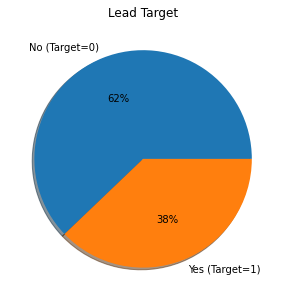

In [29]:
# Target variable is 'Converted', hence visualizing the data distribution
plt.figure(figsize=(10,5))
plt.pie(leads_final.Converted.value_counts(normalize=True)*100, labels=['No (Target=0)','Yes (Target=1)'], shadow=True, autopct="%1.f%%")
plt.title("Lead Target")
plt.show()

##### Conclusion:
From the above graph it can be concluded that around 62% people have not converted and around 38% have converted.

### 4.2. Univariate, Bivariate and Multivariate analysis

#### 4.2.a. Lead origin

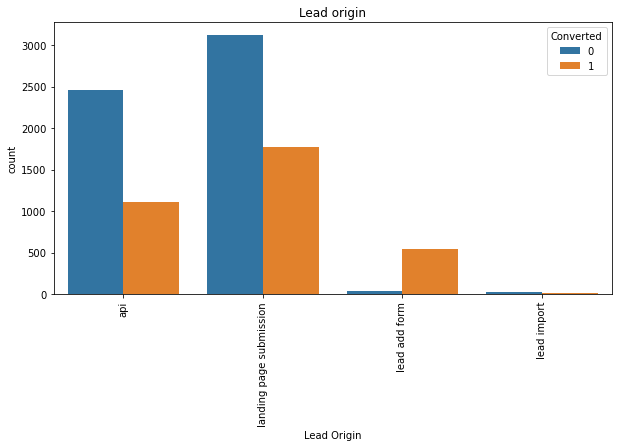

In [30]:
# Plotting the lead origin graph
plt.figure(figsize=(10,5))
sns.countplot(x='Lead Origin', hue='Converted', data=leads_final)
plt.title("Lead origin")
plt.xticks(rotation=90)
plt.show()

##### Conclusion: 
1.  Customers who were identified as Lead from Landing Page submission, constitute the majority of the leads.
2.  Customers originating from Lead Add Form have high probability of conversion. These Customers are very few in number.
3.  Lead origin-API & Lead Import have the least conversion rate. Customers from Lead Import are very few in number.</br>
To improve overall lead conversion rate, we need to focus more on improving lead converion rate of Customers originating from API and Landing Page Submission and generate more leads from Lead Add Form.

#### 4.2.b. Lead Source

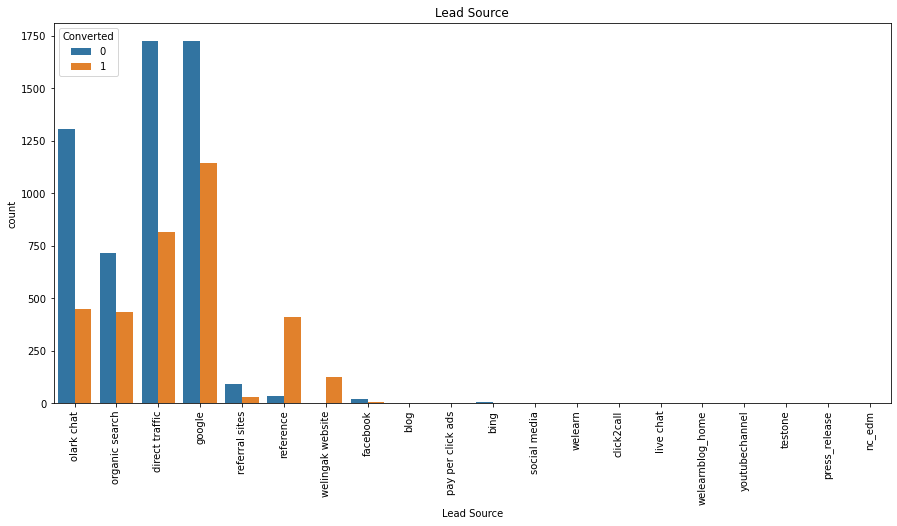

In [31]:
# Plotting the graph for Lead Source
plt.figure(figsize=(15,7))
sns.countplot(x = 'Lead Source', hue = 'Converted', data = leads_final)
plt.title("Lead Source")
plt.xticks(rotation = 90)
plt.show()

##### Conclusion:
1.  Majority source of the lead is Google & Direct Traffic. 
2.  Lead source from Google has highest probabilty of conversion. 
3.  leads with source Reference has maximum probabilty of conversion.

#### 4.2.c. Do Not Email and Do Not Call

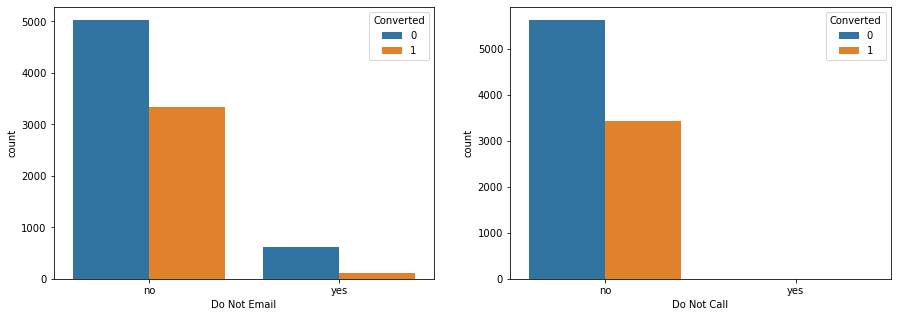

In [32]:
# Checking the Do Not Email and Do Not Call
fig, axs = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x = 'Do Not Email', hue = 'Converted', data = leads_final, ax = axs[0])
sns.countplot(x = 'Do Not Call', hue = 'Converted', data = leads_final, ax = axs[1])
plt.show()

##### Conclusion:
1.  Customers who opt for Do Not Mail have lower conversion rate.
2.  Customers who do not opt for Do Not Mail have higher conversion rate which is around 40%. These constitute the majority of the leads.
3.  Customers who do not opt for Do Not call have Higher conversion rate which is around 38%.These constitute the majority of the leads.

#### 4.2.d. Last Activity

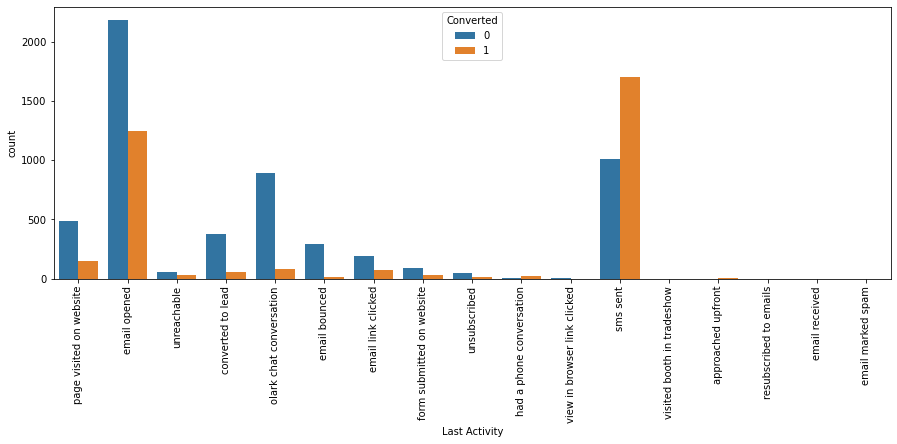

In [33]:
# Plotting the graph for Last Activity
plt.figure(figsize=(15,5))
sns.countplot(x='Last Activity', hue='Converted', data=leads_final)
plt.xticks(rotation=90)
plt.show()

##### Conclusion:
Customers who last activity was SMS Sent have higher conversion rate which is around 63Customers who last activity was Email Opened constitute majority of the customers. They have around 36% of conversion rate.

To improve overall lead conversion rate, we need to focus more on improving lead converion rate of Customers whose last activity was Email Opened and generate more leads from the ones whose last activity was SMS Sent.

#### 4.2.e. Specialization

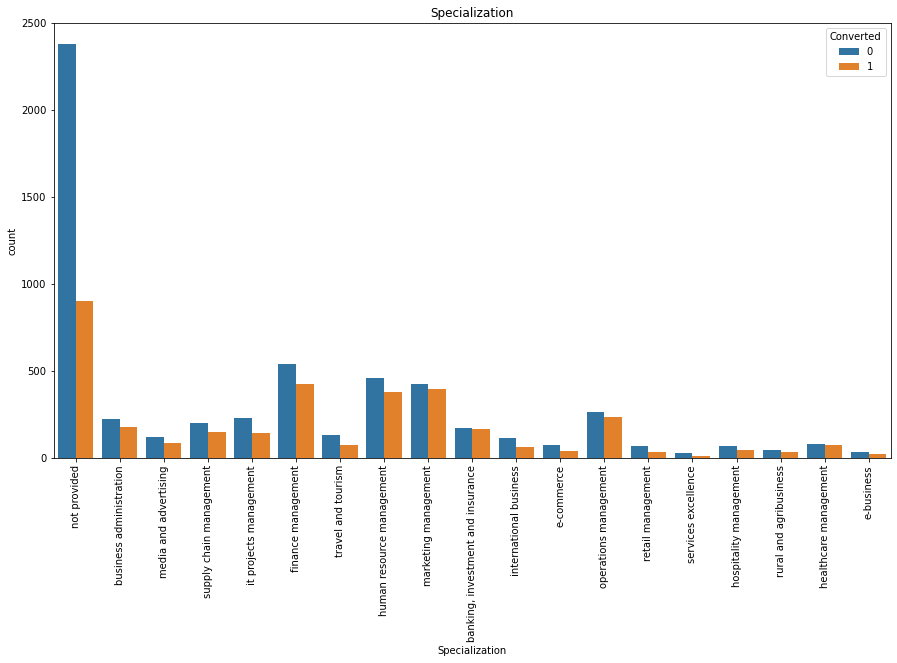

In [34]:
# Plotting the graph for specialization
plt.figure(figsize=(15,8))
sns.countplot(x='Specialization', hue='Converted', data=leads_final)
plt.title("Specialization")
plt.xticks(rotation=90)
plt.show()

##### Conclusion:
1.  Maximum Leads have specialisation as Management & Others. 
2.  Leads with specialisation as Rural & Agribusiness have least probabilty of conversion.

#### 4.2.f. Current Occupation

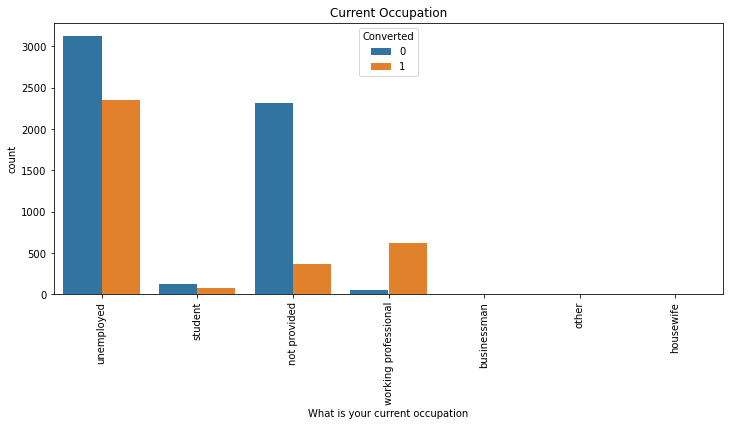

In [35]:
# Plotting the graph for Current Occupation
plt.figure(figsize=(12,5))
sns.countplot(x='What is your current occupation', hue='Converted', data=leads_final)
plt.title("Current Occupation")
plt.xticks(rotation=90)
plt.show()

##### Conclusion:
1.  Maximum Leads have occupation as Unemployed.
2.  Very few leads are Housewives

#### 4.2.g. What maters most to you in choosing a course

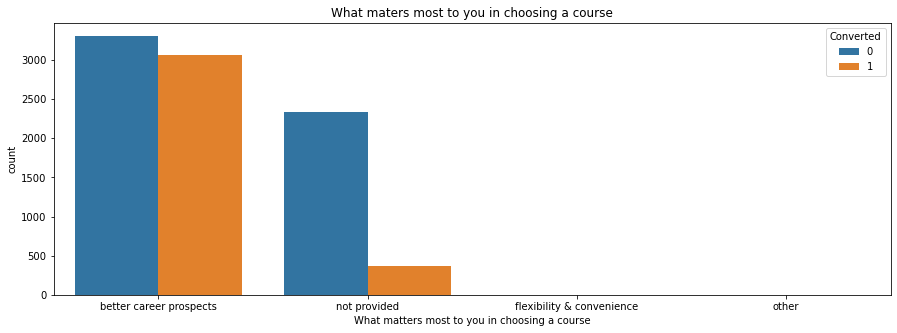

In [36]:
# Plotting the graph for What maters most to you in choosing a course
plt.figure(figsize=(15,5))
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=leads_final)
plt.title("What maters most to you in choosing a course")
plt.show()

##### Conclusion:
Number of Leads to whom better career aspects matters most in choosing a career are more & have higher probabilty of conversion.

#### 4.2. h. Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Recommnedations

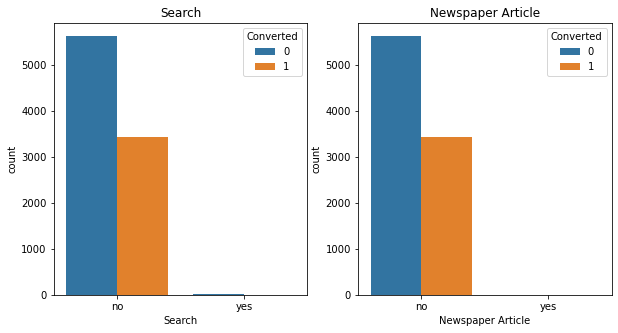

In [37]:
plt.figure(figsize=(10,5))

# Search
plt.subplot(1,2,1)
sns.countplot(x='Search', hue='Converted', data=leads_final)
plt.title("Search")

# Magazine
plt.subplot(1,2,2)
sns.countplot(x='Newspaper Article', hue='Converted', data=leads_final)
plt.title("Newspaper Article")

plt.show()

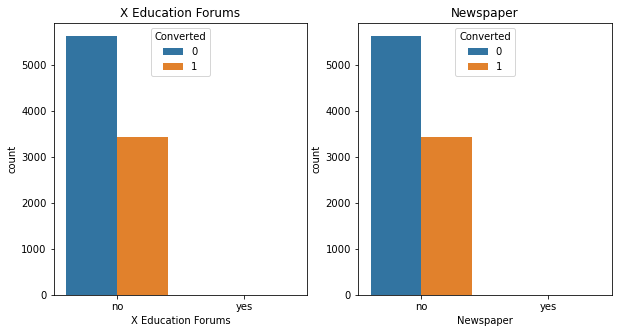

In [38]:
plt.figure(figsize=(10,5))

# Newspaper Article
plt.subplot(1,2,1)
sns.countplot(x='X Education Forums', hue='Converted', data=leads)
plt.title("X Education Forums")

# X Education Forums
plt.subplot(1,2,2)
sns.countplot(x='Newspaper', hue='Converted', data=leads)
plt.title("Newspaper")

plt.show()

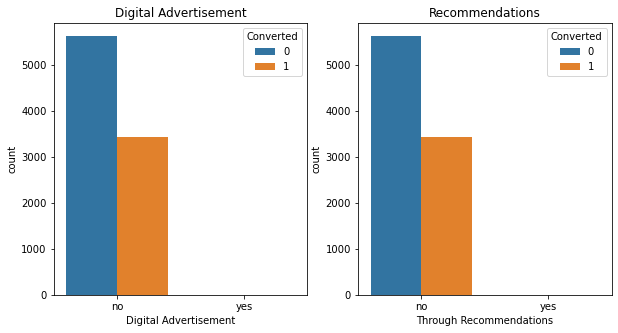

In [39]:
plt.figure(figsize=(10,5))

# Newspaper
plt.subplot(1,2,1)
sns.countplot(x='Digital Advertisement', hue='Converted', data=leads_final)
plt.title("Digital Advertisement")

#  Digital Advertisement 
plt.subplot(1,2,2)
sns.countplot(x='Through Recommendations', hue='Converted', data=leads_final)
plt.title("Recommendations")

plt.show()

##### Conclusion:
Customers who have seen the add of the education company in any form, are very few in number. Nothing meaningful insight can be concluded from the plot that will impove the overall lead conversion rate.

##### 4.2.i. A Free Copy Of Mastering the Interview

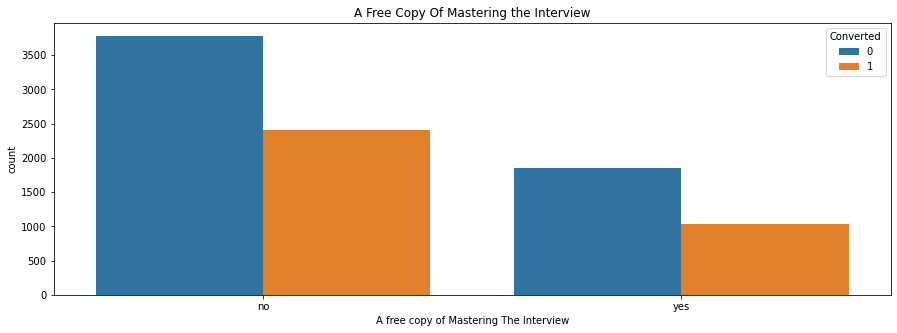

In [40]:
# Plotting graph for A Free Copy Of Mastering the Interview
plt.figure(figsize=(15,5))
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data=leads_final)
plt.title("A Free Copy Of Mastering the Interview")
plt.show()

##### Conclusion:
Customers who ask for afree copy of mastering the interview are less in number but the conversion probabilty for both type of customers is similar.

#### 4.2.j. Last Notable Activity

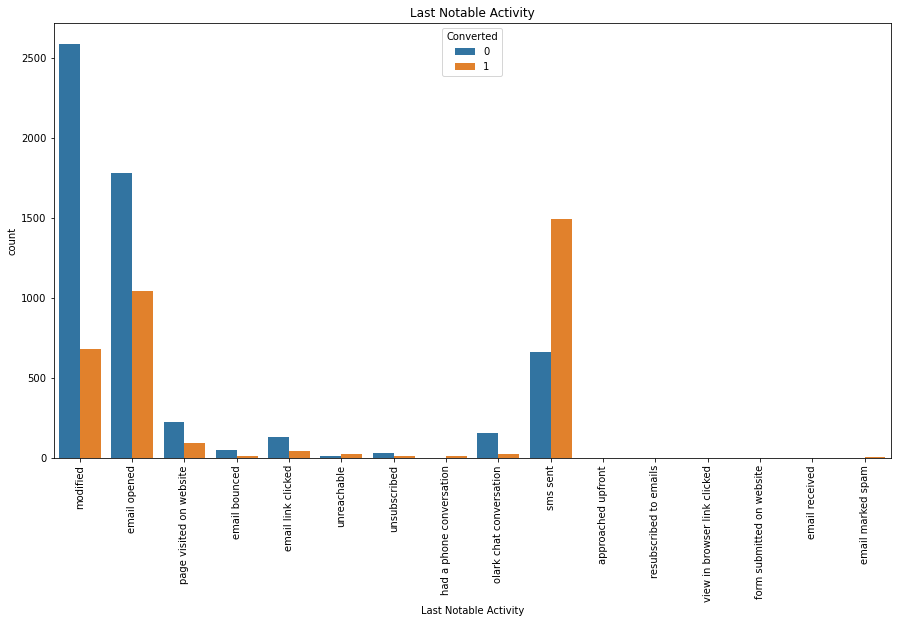

In [41]:
# Plotting a graph for Last Notable Activity
plt.figure(figsize=(15,8))
sns.countplot(x='Last Notable Activity', hue='Converted', data=leads_final)
plt.title("Last Notable Activity")
plt.xticks(rotation=90)
plt.show()

##### Conclusion:
1.  Customers whose last notable activity was Modified are more in number.
2.  Customers whose last notable activity was SMS Sent have higher probability of conversion.

### 4.3. Visualizing and handling the outliers

#### 4.3.a. Total Visits

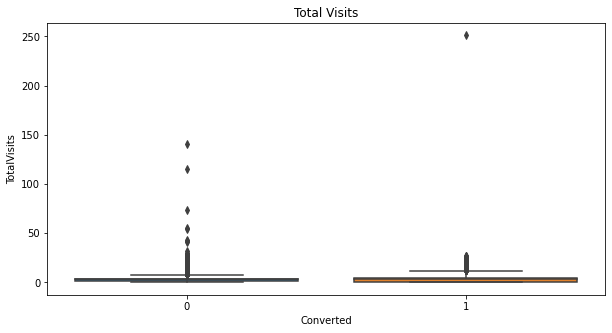

In [42]:
# Plotting the graph for Total Visits
plt.figure(figsize=(10,5))
sns.boxplot(y='TotalVisits', x="Converted", data=leads_final)
plt.title("Total Visits")
plt.show()

In [43]:
# Checking the data of the column via percentiles
leads_final['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [44]:
# Treating outliers to the 99th percentile
leads_final['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [45]:
perc = leads_final['TotalVisits'].quantile([0,0.95]).values
leads_final['TotalVisits'][leads_final['TotalVisits'] >= perc[1]] = perc[1]

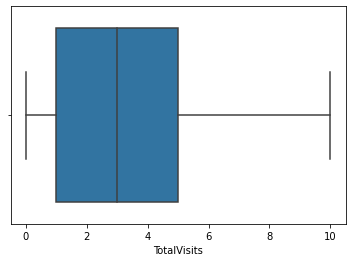

In [46]:
# Plotting the graph after treating the outliers
sns.boxplot(leads_final['TotalVisits'])
plt.show()

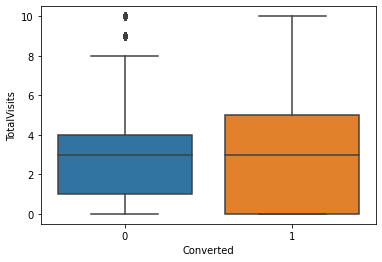

In [47]:
# Plotting the graph of the column with target variable
sns.boxplot(y='TotalVisits',x='Converted',data=leads_final)
plt.show()

#### 4.3.b. Total time Spent

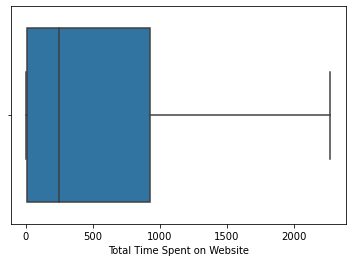

In [48]:
# Plotting the graph for Total time spent
sns.boxplot(leads_final['Total Time Spent on Website'])
plt.show()

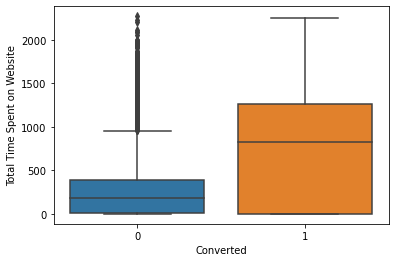

In [49]:
# Checking the column with target variable
sns.boxplot(y='Total Time Spent on Website',x='Converted',data=leads_final)
plt.show()

##### Conclusion:
Leads who spend more time on the website have higher conversion rates.

##### 4.3.c. Views Per visit

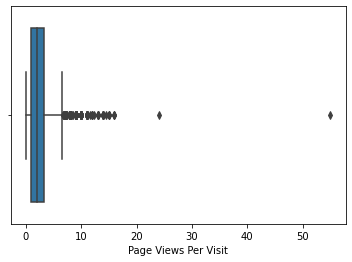

In [50]:
# Plotting for Views per visit
sns.boxplot(leads_final['Page Views Per Visit'])
plt.show()

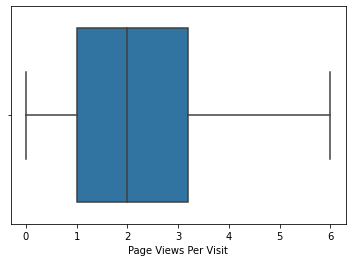

In [51]:
# Since there are many outliers, we can the outliers inside the 95th percentile
perc = leads_final['Page Views Per Visit'].quantile([0,0.95]).values
leads_final['Page Views Per Visit'][leads_final['Page Views Per Visit'] >= perc[1]] = perc[1]
sns.boxplot(leads_final['Page Views Per Visit'])
plt.show()

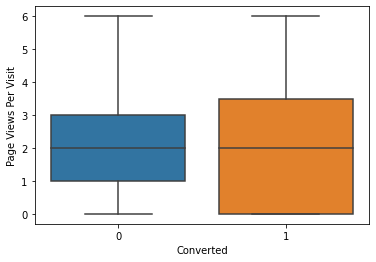

In [52]:
# Checking the column with the target variable
sns.boxplot(y='Page Views Per Visit',x='Converted',data=leads_final)
plt.show()

### 4.4. Correlation

In [53]:
# Checking the correlation between variables
leads_final_corr = leads_final.corr()

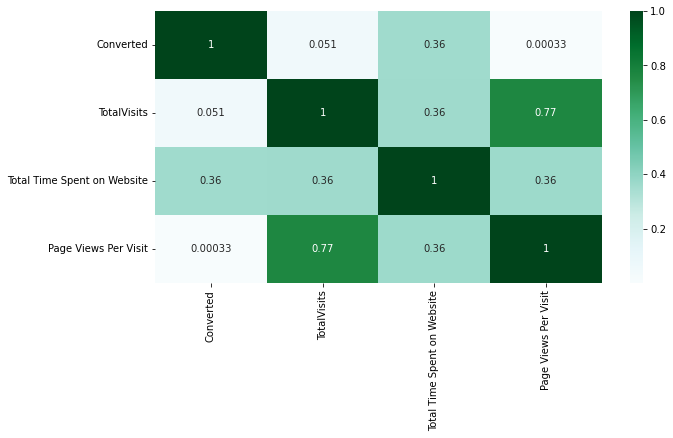

In [54]:
# Plotting the graph via heatmap to see correlation
plt.figure(figsize=(10,5))
sns.heatmap(leads_final_corr, cmap='BuGn', annot=True)
plt.show()

##### Conclusion:
From the above graph we can conclude that all the variables are multicollinear in nature. The correlation between the Total Visits and Page Views Per visit is high. 

## 5. Dummy Variables

In [55]:
leads_final.loc[:, leads_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [56]:
# Create dummy variables using the 'get_dummies'
dummy_leads = pd.get_dummies(leads_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Add the results to the original dataframe
leads_final_dum = pd.concat([leads_final, dummy_leads], axis=1)
leads_final_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,outside india,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0


In [57]:
# Dropping the unwanted columns 
leads_final_dum = leads_final_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
leads_final_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## 6. Splitting the data

### 6.1. Splitting the data into Train and test Data sets

In [58]:
# Dropping the Converted column from X axis 
X = leads_final_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [59]:
# Assigning the target variable in y axis
y = leads_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [60]:
# Splittng the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [61]:
# Checking the shape of train data set
print("X_train", X_train.shape,'\n')
print("y_train", y_train.shape)

X_train (6351, 80) 

y_train (6351,)


In [62]:
# Checking the shape of test data set
print("X_test", X_test.shape,'\n')
print("y_test", y_test.shape)

X_test (2723, 80) 

y_test (2723,)


## 7. Scaling the data

### 7.1. Scaling and Fitting the data

In [63]:
# Using MinMax Scaler for scaling the features
scaler = MinMaxScaler()

In [64]:
# Applying the scaler and fitting on the data to the numerical features
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [65]:
# Checking the head of the data after fitting 
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.2,0.612676,0.333333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3604,0.0,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.6,0.751761,1.000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.0,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.2,0.787852,0.333333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


##### Since there are a lot of variables it is difficult to drop variable. We'll do it after RFE

## 8. Model Building 

### 8.1. Feature selection using RFE

In [66]:
# Building the model
logreg = LogisticRegression()

rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_landing page submission', False, 28),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 41),
 ('Specialization_business administration', False, 35),
 ('Specialization_e-business', False, 31),
 ('Specialization_e-commerce', False, 23),
 ('Specialization_finance management', False, 32),
 ('Specialization_healthcare management', False, 26),
 ('Specialization_hospitality management', False, 43),
 ('Specialization_human resource management', False, 33),
 ('Specialization_international business', False, 38),
 ('Specialization_it projects management', False, 30),
 ('Specialization_marketing management', False, 22),
 ('Specialization_media and advertising', False, 39),
 ('Specialization_operations management', False, 27),
 ('Specialization_retail management', False, 61),
 ('Specialization_rural and agribusiness', False, 25),
 ('Specialization_ser

In [67]:
# Put all the columns selected by RFE in the variable 'column'
column = X_train.columns[rfe.support_]

All the variables selected by RFE, next statistics part (p-values and the VIFs)

In [68]:
# Selecting columns selected by RFE
X_train = X_train[column]

In [69]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2704.3
Date:                Tue, 03 Jan 2023   Deviance:                       5408.6
Time:                        22:08:11   Pearson chi2:                 6.31e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3830
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5714      0.093    -27.737      0.000      -2.753      -2.390
Total Time Spent on Website                              3.9100      0.147     26.617      0.000       3.622       4.198
Lead Origin_lead add form                                2.9011      0.219     13.271      0.000       2.473       3.330
Lead Source_direct traffic                              -0.6698      0.081     -8.311      0.000      -0.828      -0.512
Lead Source_organic search                              -0.4298      0.102     -4.210      0.000      -0.630      -0.230
Lead Source_welingak website                             2.5670      1.032      2.488      0.013       0.545       4.589
Do Not Email_yes                                        -1.3430      0.167     -8.058      0.000      -1.670      -1.016
Last Activity_olark chat conversation                   -1.0514      0.165     -6.368      0.000      -1.375      -0.728
Last Activity_sms sent                                   1.2805      0.073     17.589      0.000       1.138       1.423
What is your current occupation_housewife               24.1648   1.92e+04      0.001      0.999   -3.75e+04    3.76e+04
What is your current occupation_other                    2.3197      0.754      3.077      0.002       0.842       3.797
What is your current occupation_student                  1.3007      0.226      5.752      0.000       0.858       1.744
What is your current occupation_unemployed               1.1104      0.085     13.108      0.000       0.944       1.276
What is your current occupation_working professional     3.5799      0.203     17.615      0.000       3.182       3.978
Last Notable Activity_had a phone conversation          22.7790   1.41e+04      0.002      0.999   -2.75e+04    2.76e+04
Last Notable Activity_unreachable                        1.7274      0.612      2.823      0.005       0.528       2.927
========================================================================================================================
"""

### 8.2. VIF

#### 8.2.a. Model - 1

In [70]:
# Making a VIF dataframe for all the present variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_unemployed,2.17
0,Total Time Spent on Website,1.90
1,Lead Origin_lead add form,1.57
2,Lead Source_direct traffic,1.51
7,Last Activity_sms sent,1.51
4,Lead Source_welingak website,1.31
12,What is your current occupation_working profes...,1.30
3,Lead Source_organic search,1.23
5,Do Not Email_yes,1.09
6,Last Activity_olark chat conversation,1.05


In [71]:
# The VIF values seem fine but the p-values aren't. So removing 'Last Notable Activity had a phone conversation.'

# Dropping the column
X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

#### 8.2.b. Model - 2

In [72]:
# Refitting the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2711.0
Date:                Tue, 03 Jan 2023   Deviance:                       5422.0
Time:                        22:08:11   Pearson chi2:                 6.31e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3817
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5656      0.093    -27.710      0.000      -2.747      -2.384
Total Time Spent on Website                              3.9068      0.147     26.637      0.000       3.619       4.194
Lead Origin_lead add form                                2.8927      0.219     13.236      0.000       2.464       3.321
Lead Source_direct traffic                              -0.6760      0.081     -8.395      0.000      -0.834      -0.518
Lead Source_organic search                              -0.4296      0.102     -4.215      0.000      -0.629      -0.230
Lead Source_welingak website                             2.5673      1.032      2.488      0.013       0.545       4.589
Do Not Email_yes                                        -1.3463      0.167     -8.082      0.000      -1.673      -1.020
Last Activity_olark chat conversation                   -1.0600      0.165     -6.422      0.000      -1.384      -0.736
Last Activity_sms sent                                   1.2733      0.073     17.505      0.000       1.131       1.416
What is your current occupation_housewife               23.1609   1.16e+04      0.002      0.998   -2.27e+04    2.28e+04
What is your current occupation_other                    2.3203      0.754      3.077      0.002       0.842       3.798
What is your current occupation_student                  1.3005      0.226      5.753      0.000       0.857       1.744
What is your current occupation_unemployed               1.1165      0.085     13.189      0.000       0.951       1.282
What is your current occupation_working professional     3.5811      0.203     17.628      0.000       3.183       3.979
Last Notable Activity_unreachable                        1.7195      0.612      2.809      0.005       0.520       2.919
========================================================================================================================
"""

In [73]:
# Making a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_unemployed,2.16
0,Total Time Spent on Website,1.90
1,Lead Origin_lead add form,1.57
2,Lead Source_direct traffic,1.51
7,Last Activity_sms sent,1.51
4,Lead Source_welingak website,1.31
12,What is your current occupation_working profes...,1.30
3,Lead Source_organic search,1.23
5,Do Not Email_yes,1.09
6,Last Activity_olark chat conversation,1.05


In [74]:
# The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation housewife'

# Dropping the column
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

#### 8.2.c. Model - 3

In [75]:
# Refittng the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2718.9
Date:                Tue, 03 Jan 2023   Deviance:                       5437.8
Time:                        22:08:12   Pearson chi2:                 6.33e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3802
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5445      0.092    -27.664      0.000      -2.725      -2.364
Total Time Spent on Website                              3.9053      0.146     26.664      0.000       3.618       4.192
Lead Origin_lead add form                                2.9125      0.219     13.326      0.000       2.484       3.341
Lead Source_direct traffic                              -0.6727      0.080     -8.367      0.000      -0.830      -0.515
Lead Source_organic search                              -0.4171      0.102     -4.104      0.000      -0.616      -0.218
Lead Source_welingak website                             2.5512      1.032      2.473      0.013       0.529       4.573
Do Not Email_yes                                        -1.3507      0.166     -8.113      0.000      -1.677      -1.024
Last Activity_olark chat conversation                   -1.0665      0.165     -6.466      0.000      -1.390      -0.743
Last Activity_sms sent                                   1.2655      0.073     17.424      0.000       1.123       1.408
What is your current occupation_other                    2.2958      0.754      3.045      0.002       0.818       3.773
What is your current occupation_student                  1.2781      0.226      5.658      0.000       0.835       1.721
What is your current occupation_unemployed               1.0955      0.084     13.021      0.000       0.931       1.260
What is your current occupation_working professional     3.5593      0.203     17.541      0.000       3.162       3.957
Last Notable Activity_unreachable                        1.7106      0.612      2.797      0.005       0.512       2.909
========================================================================================================================
"""

In [76]:
# Making a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_unemployed,2.16
0,Total Time Spent on Website,1.90
1,Lead Origin_lead add form,1.57
2,Lead Source_direct traffic,1.51
7,Last Activity_sms sent,1.51
4,Lead Source_welingak website,1.31
11,What is your current occupation_working profes...,1.30
3,Lead Source_organic search,1.23
5,Do Not Email_yes,1.09
6,Last Activity_olark chat conversation,1.05


In [77]:
# The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation other'

# Dropping the column
X_train.drop('What is your current occupation_other', axis = 1, inplace = True)

#### 8.2.d. Model - 4

In [78]:
# Refitting the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2723.9
Date:                Tue, 03 Jan 2023   Deviance:                       5447.8
Time:                        22:08:12   Pearson chi2:                 6.33e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3792
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5246      0.091    -27.637      0.000      -2.704      -2.346
Total Time Spent on Website                              3.9169      0.146     26.763      0.000       3.630       4.204
Lead Origin_lead add form                                2.9185      0.219     13.356      0.000       2.490       3.347
Lead Source_direct traffic                              -0.6651      0.080     -8.286      0.000      -0.822      -0.508
Lead Source_organic search                              -0.4115      0.102     -4.053      0.000      -0.611      -0.212
Lead Source_welingak website                             2.5519      1.032      2.474      0.013       0.530       4.574
Do Not Email_yes                                        -1.3558      0.166     -8.150      0.000      -1.682      -1.030
Last Activity_olark chat conversation                   -1.0627      0.165     -6.451      0.000      -1.386      -0.740
Last Activity_sms sent                                   1.2588      0.073     17.357      0.000       1.117       1.401
What is your current occupation_student                  1.2528      0.226      5.552      0.000       0.811       1.695
What is your current occupation_unemployed               1.0719      0.084     12.836      0.000       0.908       1.236
What is your current occupation_working professional     3.5351      0.203     17.446      0.000       3.138       3.932
Last Notable Activity_unreachable                        1.7032      0.611      2.787      0.005       0.505       2.901
========================================================================================================================
"""

In [79]:
# Making a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_unemployed,2.16
0,Total Time Spent on Website,1.89
1,Lead Origin_lead add form,1.57
2,Lead Source_direct traffic,1.51
7,Last Activity_sms sent,1.51
4,Lead Source_welingak website,1.31
10,What is your current occupation_working profes...,1.30
3,Lead Source_organic search,1.23
5,Do Not Email_yes,1.09
6,Last Activity_olark chat conversation,1.05


##### All the VIF values are good and all the p-values are below 0.05. So we can fix model

## 9. Creating Prediction

In [80]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.720527
3604    0.074148
5584    0.206296
7679    0.074148
7563    0.466522
7978    0.749544
7780    0.152388
7863    0.982324
838     0.799250
708     0.252463
dtype: float64

In [81]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.72052745, 0.07414836, 0.20629606, 0.07414836, 0.46652152,
       0.74954394, 0.15238791, 0.98232437, 0.79925003, 0.25246315])

In [82]:
# Checking the Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.720527
1,0,0.074148
2,0,0.206296
3,0,0.074148
4,0,0.466522


In [83]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.720527,1
1,0,0.074148,0
2,0,0.206296,0
3,0,0.074148,0
4,0,0.466522,0


## 10. Model Evaluation

In [84]:
# Creating confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3429,  466],
       [ 818, 1638]], dtype=int64)

In [85]:
# Checking the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7978271138403401

##### Conclusion:
That overall accuracy is at 81% which is good and above the target. 

In [86]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [87]:
# Calculating the sensitivity
TP/(TP+FN)

0.6669381107491856

In [88]:
# Calculating the specificity
TN/(TN+FP)

0.8803594351732991

##### Conclusion:
With the Cut off of 0.5, the accuracy is around 81%, sensitivity is around 70% and specificity is around 88%.

## 11. Optimise Cut Off (ROC Curve)

In [89]:
# Due to random selection of cut off, now need to find the optimum one

# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [90]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

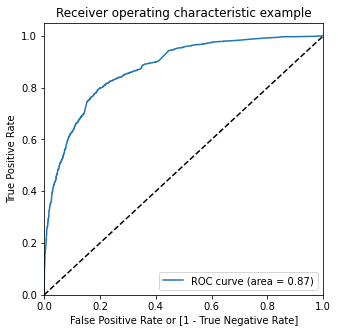

In [91]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

##### Conclusion:
The area under ROC curve is 0.88 indicating a very good value.

In [92]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.720527,1,1,1,1,1,1,1,1,1,0,0
1,0,0.074148,0,1,0,0,0,0,0,0,0,0,0
2,0,0.206296,0,1,1,1,0,0,0,0,0,0,0
3,0,0.074148,0,1,0,0,0,0,0,0,0,0,0
4,0,0.466522,0,1,1,1,1,1,0,0,0,0,0


In [93]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_leads = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_leads.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_leads

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.601952,0.978827,0.364313
0.2,0.2,0.720359,0.897801,0.608472
0.3,0.3,0.781609,0.831026,0.750449
0.4,0.4,0.803496,0.775651,0.821053
0.5,0.5,0.797827,0.666938,0.880359
0.6,0.6,0.789797,0.583876,0.919641
0.7,0.7,0.772477,0.495928,0.946855
0.8,0.8,0.749803,0.401059,0.969705
0.9,0.9,0.705558,0.253664,0.990501


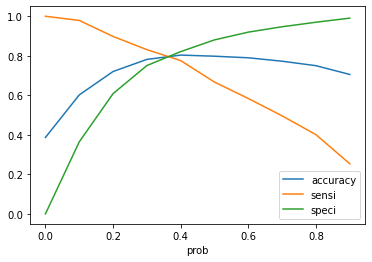

In [94]:
# Plotting the graph
cutoff_leads.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [95]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.720527,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.074148,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.206296,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.074148,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.466522,0,1,1,1,1,1,0,0,0,0,0,1


In [96]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7953078255392851

In [97]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3082,  813],
       [ 487, 1969]], dtype=int64)

In [98]:
# Substituting the value of true positive
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [99]:
# Calculating the sensitivity
TP/(TP+FN)

0.8017100977198697

In [100]:
# Calculating the specificity
TN/(TN+FP)

0.7912708600770219

##### Conclusion:
With the cut off of 0.35, the accuracy, sensitivity and specificity is around 80%.

## 12. Prediction on Test set

In [101]:
# Scaling the numeric values 
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [102]:
# Substituting all the columns in the final model
column_test = X_train.columns

In [103]:
# Select the columns in X_train for X_test as well
X_test = X_test[column_test]

# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[column_test])
X_test_sm
X_test_sm

,const,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_organic search,Lead Source_welingak website,Do Not Email_yes,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_unreachable
8308,1.0,0.416813,0,1,0,0,0,0,0,0,1,0,0
7212,1.0,0.001320,0,0,1,0,0,0,1,0,0,1,0
2085,1.0,0.000000,1,0,0,1,0,0,0,0,1,0,0
4048,1.0,0.617077,0,1,0,0,0,0,1,0,1,0,0
4790,1.0,0.005282,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0,0,0,0,0,1,0,0,1,0,0
8179,1.0,0.148768,0,0,0,0,0,0,1,0,0,0,0
6236,1.0,0.000000,0,0,0,0,0,0,0,0,0,0,0
5240,1.0,0.458627,0,0,0,0,0,0,1,0,1,0,0


In [104]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to leads
y_pred_leads = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_leads = pd.DataFrame(y_test)

# Removing index for both dataframes to append them side by side 
y_pred_leads.reset_index(drop=True, inplace=True)
y_test_leads.reset_index(drop=True, inplace=True)

# Appending y_test_leads and y_pred_leads
y_pred_final = pd.concat([y_test_leads, y_pred_leads],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.381020
1,1,0.865639
2,1,0.982324
3,1,0.826074
4,0,0.109373


In [105]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.381020,1
1,1,0.865639,1
2,1,0.982324,1
3,1,0.826074,1
4,0,0.109373,0
...,...,...,...
2718,1,0.074780,0
2719,0,0.335573,0
2720,0,0.074148,0
2721,1,0.832372,1


In [106]:
# Checking the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8053617333822989

In [107]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1383,  361],
       [ 169,  810]], dtype=int64)

In [108]:
# Substituting the value of true positive
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [109]:
# Calculating the sensitivity
TP/(TP+FN)

0.8273748723186926

In [110]:
# Calculating the specificity
TN/(TN+FP)

0.7930045871559633

##### Conclusion:
With the cut off of 0.35, the accuracy, sensitivity and specifity is around 80%.

## 13. Precision - Recall

### 13.1. Precision - Recall 

In [111]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3429,  466],
       [ 818, 1638]], dtype=int64)

In [112]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7785171102661597

In [113]:
# Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6669381107491856

##### Conclusion: 
With the cut off of 0.35, we have Precision around 79% and Recall around 70%.

### 13.2. Precision and Recall tradeoff

In [114]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [115]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

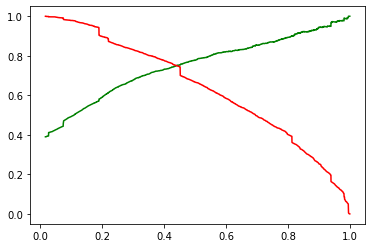

In [116]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [117]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.720527,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.074148,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.206296,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.074148,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.466522,0,1,1,1,1,1,0,0,0,0,0,1


In [118]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8034955125177138

In [119]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3212,  683],
       [ 565, 1891]], dtype=int64)

In [120]:
# Substituting the value of true positive
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [121]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7346542346542346

In [122]:
# Recall = TP / TP + FN
TP / (TP + FN)

0.7699511400651465

##### Conclusion:
With the cut off of 0.41, the precision is around 74% and recall is around 76%.

## 14. Prediction on Test Set

In [123]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to leads
y_pred_leads = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_leads = pd.DataFrame(y_test)

# Removing index for both dataframes to append them side by side 
y_pred_leads.reset_index(drop=True, inplace=True)
y_test_leads.reset_index(drop=True, inplace=True)

# Appending y_test_leads and y_pred_leads
y_pred_final = pd.concat([y_test_leads, y_pred_leads],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.381020
1,1,0.865639
2,1,0.982324
3,1,0.826074
4,0,0.109373


In [124]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.381020,0
1,1,0.865639,1
2,1,0.982324,1
3,1,0.826074,1
4,0,0.109373,0
...,...,...,...
2718,1,0.074780,0
2719,0,0.335573,0
2720,0,0.074148,0
2721,1,0.832372,1


In [125]:
# Checking the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.811972089607051

In [126]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1439,  305],
       [ 207,  772]], dtype=int64)

In [127]:
# Substituting the value of true positive
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [128]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7168059424326834

In [129]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7885597548518897

##### Conclusion:
With the cut off of 0.41, the precision is around 73% and recall is around 76%.

## 15. Conclusion 

1.  From the analysis it was found that when the time is limited with the company, it needs to approach the hot leads i.e. those customers who are more likely to have conversion chance to achieve maximum conversion. 
2.  When the time is ample with the company along with resources and time it needs to approach all the potential leads and also approach customers who have lesser conversion rate to imporve overall conversion rate.
3.  From the analysis, the variables that mattered the most in potential buyers were as follows:
-  Total time spent on the website
-  Total number of visits
-  When their current occupation is as a working professional. </br>
4.  To improve overall lead conversion rate, we need to focus more on improving lead converion rate of Customers originating from API and Landing Page Submission and generate more leads from Lead Add Form.
5.  To improve overall lead conversion rate, we need to focus more on improving lead converion rate of Customers whose last activity was Email Opened and generate more leads from the ones whose last activity was SMS Sent.